In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("allegations_202007271729.csv")

# Display the first few rows
df.head()


,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


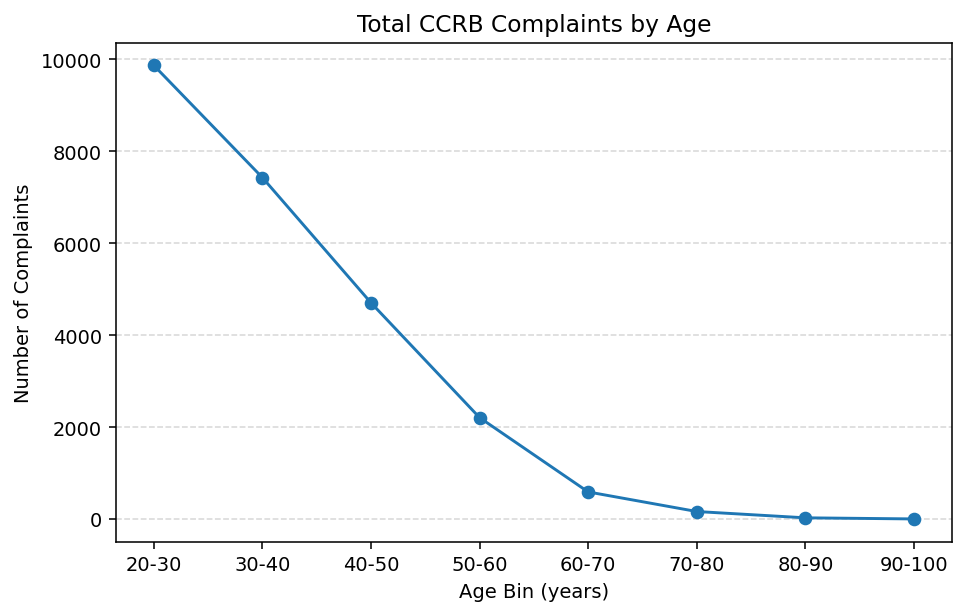

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load
df = pd.read_csv("allegations_202007271729.csv", low_memory=False)

# Clean ages
ages = pd.to_numeric(df["complainant_age_incident"], errors="coerce")
ages = ages[(ages >= 10) & (ages <= 100)]

# 10-year bins
bins = list(range(10, 110, 10))
labels = [f"{a}-{a+10}" for a in range(10, 100, 10)]
age_bins = pd.cut(ages, bins=bins, right=False, labels=labels)
counts = age_bins.value_counts().sort_index()

# Drop first bin (10–20)
counts = counts.iloc[1:]

# Plot
plt.figure(figsize=(7, 4.5), dpi=140)
plt.plot(counts.index.astype(str), counts.values, marker="o")
plt.title("Total CCRB Complaints by Age")
plt.xlabel("Age Bin (years)")
plt.ylabel("Number of Complaints")
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


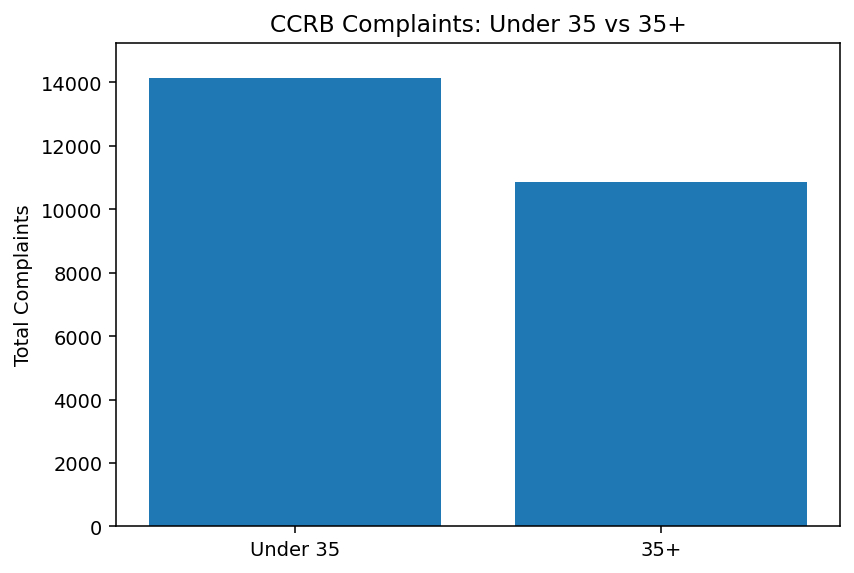

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load
df = pd.read_csv("allegations_202007271729.csv", low_memory=False)

# Clean ages
ages = pd.to_numeric(df["complainant_age_incident"], errors="coerce")
ages = ages[(ages >= 10) & (ages <= 100)]

# Focus on adults to avoid the teen edge case
ages_adult = ages[ages >= 20]

# Sensible cutoff: median adult age, rounded to the nearest 5 (e.g., 32 -> 30)
median_age = float(ages_adult.median())
cutoff = 35

# Group counts
younger_ct = (ages_adult < cutoff).sum()
older_ct   = (ages_adult >= cutoff).sum()

# Zero-based bar plot (no tricks)
plt.figure(figsize=(6.2, 4.2), dpi=140)
plt.bar([f"Under {cutoff}", f"{cutoff}+"], [younger_ct, older_ct])
plt.title(f"CCRB Complaints: Under {cutoff} vs {cutoff}+")
plt.ylabel("Total Complaints")
plt.ylim(0, max(younger_ct, older_ct) * 1.08)
plt.tight_layout()
plt.show()
